# Products

# Imports

In [1]:
import pandas as pd
import seaborn as sns
from functools import wraps
import datetime as dt

# Log-Wrapper

In [2]:
def log_step(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        tic = dt.datetime.now()
        result = func(*args, **kwargs)
        time_taken = str(dt.datetime.now() - tic)
        print(f"{func.__name__}:\n shape={result.shape} took {time_taken}s\n")
        global df_rows

        df_rows.append(result.shape[0])
        return result


    return wrapper

## Pipeline Functions

### Pipeline Init

In [3]:
filename = "products"
init_df = pd.read_csv("../../eniac-data/"+filename+".csv")

df_rows = []


@log_step
def start_pipeline(data_frame):
    global df_rows
    df_rows = []
    df_rows.append(init_df.shape[0])
    return data_frame.copy()

init_df.shape


(19326, 7)

### Rename Columns

In [4]:
@log_step
def rename_columns(data_frame):
    data_frame.rename(columns={"sku":"product_sku",
                             "name":"product_name",
                             "desc":"product_description",
                             "price":"product_price",
                             "promo_price":"product_promo_price",
                             "type":"product_type"}, inplace = True)
    
    return data_frame

### Set Data Types

In [5]:
@log_step
def set_data_types(data_frame):
   # data_frame["new_price"] = data_frame.product_price.replace("\.\d{2,3}$", "d{2,3}$", regex = True)
#    data_frame.new_price.astype("float")
    return data_frame

### Remove Duplicates

In [6]:
@log_step
def remove_duplicates(data_frame):
    return data_frame.drop_duplicates()

In [7]:
@log_step
def drop_nan(data_frame):
    return data_frame.dropna()


### Remove Outliers

In [8]:
@log_step
def remove_outliers(data_frame):
    return data_frame

## Pipeline UI

start_pipeline:
 shape=(19326, 7) took 0:00:00.002127s

rename_columns:
 shape=(19326, 7) took 0:00:00.000651s

set_data_types:
 shape=(19326, 7) took 0:00:00.000002s

remove_duplicates:
 shape=(10580, 7) took 0:00:00.037284s

drop_nan:
 shape=(10477, 7) took 0:00:00.009219s

remove_outliers:
 shape=(10477, 7) took 0:00:00.000005s



/Users/simozilling/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

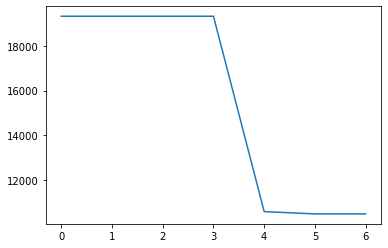

In [9]:
df = init_df\
        .pipe(start_pipeline)\
        .pipe(rename_columns)\
        .pipe(set_data_types)\
        .pipe(remove_duplicates)\
        .pipe(drop_nan)\
        .pipe(remove_outliers)
sns.lineplot(list(range(len(df_rows))), df_rows) 

In [10]:
df.head()

,product_sku,product_name,product_description,product_price,product_promo_price,in_stock,product_type
0,RAI0007,Silver Rain Design mStand Support,Aluminum support compatible with all MacBook,59.99,499.899,1,8696
1,APP0023,Apple Mac Keyboard Keypad Spanish,USB ultrathin keyboard Apple Mac Spanish.,59,589.996,0,13855401
2,APP0025,Mighty Mouse Apple Mouse for Mac,mouse Apple USB cable.,59,569.898,0,1387
3,APP0072,Apple Dock to USB Cable iPhone and iPod white,IPhone dock and USB Cable Apple iPod.,25,229.997,0,1230
4,KIN0007,Mac Memory Kingston 2GB 667MHz DDR2 SO-DIMM,2GB RAM Mac mini and iMac (2006/07) MacBook Pr...,34.99,31.99,1,1364


In [11]:
df.dtypes

product_sku            object
product_name           object
product_description    object
product_price          object
product_promo_price    object
in_stock                int64
product_type           object
dtype: object

In [12]:
df.describe()

,in_stock
count,10477.000000
mean,0.195476
std,0.396585
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [13]:
df.to_csv("../../clean_data/clean_"+filename+".csv")

In [14]:
df["str_split"] = df.product_price.str.split('.') 

df['new_product_price'] = df["str_split"]
df[["product_price", "new_product_price"]].sort_values("product_price")

,product_price,new_product_price
14756,1.090.004,"[1, 090, 004]"
12316,1.099.043,"[1, 099, 043]"
1459,1.169.795,"[1, 169, 795]"
17392,1.199.897,"[1, 199, 897]"
11102,1.199.897,"[1, 199, 897]"
...,...,...
10876,999.896,"[999, 896]"
10745,999.944,"[999, 944]"
2670,999.944,"[999, 944]"
19050,999.944,"[999, 944]"


In [15]:


df_rows


[19326, 19326, 19326, 19326, 10580, 10477, 10477]